In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
file_path = "../data/Visa_Predection_Dataset.csv"
df_visa = pd.read_csv(file_path)
df_visa

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.7900,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified


- In every dataset, we have different columns that have different units
- In every dataset, we have different columns that values varies from -Inf to Inf
- It is very important to standarize the data that make sure all the column values are under same range
- To achieve this, we have two methods.
  - Normalization
    - min max scalar
  - Standarization
    - Z-score

![Min Max Scaler](https://miro.medium.com/v2/0*HFa_v2GJQMtwkru1.png)

#### Standarization

##### Z-score

In [6]:
# step-1: calculating min value of p_wage = min_wage
# step-2: calculating max value of p_age = max_wage
# step-3: calculate denominator max_wage - min_wage
# step-4: numerator = p_wage-min_wage
# step-5: numerator / denominator


#### Implementation and checkpoints for the standarization manually

In [22]:
p_wage = df_visa['prevailing_wage']
min_wage = p_wage.min()
max_wage = p_wage.max()
denominator = max_wage - min_wage
numerator = p_wage - p_wage.min()
df_visa['prevailing_wage_norm'] = numerator / denominator

In [23]:
df_visa[['prevailing_wage', 'prevailing_wage_norm']]

,prevailing_wage,prevailing_wage_norm
0,592.2029,0.001849
1,83425.6500,0.261345
2,122996.8600,0.385312
3,83434.0300,0.261371
4,149907.3900,0.469616
...,...,...
25475,77092.5700,0.241505
25476,279174.7900,0.874579
25477,146298.8500,0.458311
25478,86154.7700,0.269895


In [25]:
df_visa['prevailing_wage_norm'].min(), df_visa['prevailing_wage_norm'].max() 

(0.0, 1.0)

In [26]:
df_visa['prevailing_wage'].min(), df_visa['prevailing_wage'].max() 

(2.1367, 319210.27)

In [34]:
max_id = df_visa['prevailing_wage_norm'].idxmax()
min_id = df_visa['prevailing_wage_norm'].idxmin()
max_id, min_id

(21077, 20575)

In [35]:
df_visa[['prevailing_wage', 'prevailing_wage_norm']].iloc[[max_id, min_id]]

,prevailing_wage,prevailing_wage_norm
21077,319210.2700,1.0
20575,2.1367,0.0


#### MinMaxScaler

- MinMaxScaler is a method from sklearn preprocessing
- Read the package
- Save the package
- Apply Fit Transform
- Note: Inside the mms.fit_transform method we pass the dataframe not the series.

In [44]:
# step-1
from sklearn.preprocessing import MinMaxScaler
# step-2
mms = MinMaxScaler()
# step-3
df_visa['prevailing_wage_norm1'] = mms.fit_transform(df_visa[['prevailing_wage']]) ## inside mms we pass the pd.DataFrame not pd.Series

In [47]:
df_visa[['prevailing_wage_norm', 'prevailing_wage_norm1']]

,prevailing_wage_norm,prevailing_wage_norm1
0,0.001849,0.001849
1,0.261345,0.261345
2,0.385312,0.385312
3,0.261371,0.261371
4,0.469616,0.469616
...,...,...
25475,0.241505,0.241505
25476,0.874579,0.874579
25477,0.458311,0.458311
25478,0.269895,0.269895


#### Z-score

In [57]:
# step-1: calculating mean
# step-2: calculate std
# step-3: calculate numerator = x - mean
# step-4: numerator = x - mean

Mean = df_visa['prevailing_wage'].mean()
Std = df_visa['prevailing_wage'].std()
numerator = df_visa['prevailing_wage'] - mean
df_visa['prevailing_wage_Z'] = numerator / Std

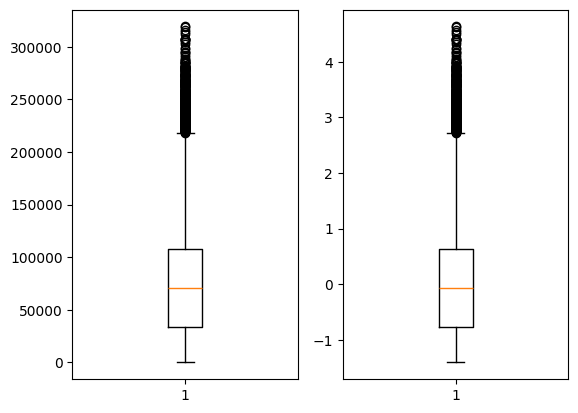

In [60]:
plt.subplot(1,2,1)
plt.boxplot(df_visa['prevailing_wage'])
plt.subplot(1,2,2)
plt.boxplot(df_visa['prevailing_wage_Z'])
plt.show()

In [ ]:
# Influential outliers, we're verifying

In [65]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

df_visa['prevailing_wage_sscaler'] = ss.fit_transform(df_visa[['prevailing_wage']])

In [67]:
df_visa[['prevailing_wage_Z', 'prevailing_wage_sscaler']]

,prevailing_wage_Z,prevailing_wage_sscaler
0,-1.398510,-1.398537
1,0.169832,0.169835
2,0.919060,0.919079
3,0.169991,0.169994
4,1.428576,1.428604
...,...,...
25475,0.049923,0.049924
25476,3.876083,3.876159
25477,1.360253,1.360280
25478,0.221504,0.221509


In [68]:
df_visa

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status,prevailing_wage_norm,prevailing_wage_norm1,prevailing_wage_Z,prevailing_wage_sscaler
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied,0.001849,0.001849,-1.398510,-1.398537
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified,0.261345,0.261345,0.169832,0.169835
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied,0.385312,0.385312,0.919060,0.919079
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied,0.261371,0.261371,0.169991,0.169994
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified,0.469616,0.469616,1.428576,1.428604
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified,0.241505,0.241505,0.049923,0.049924
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.7900,Year,Y,Certified,0.874579,0.874579,3.876083,3.876159
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified,0.458311,0.458311,1.360253,1.360280
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified,0.269895,0.269895,0.221504,0.221509
